In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trajectory(t):
    v = 100
    return v*t

In [4]:
def radar(traj, time, sigma):
    x = traj(time)
    e = np.random.randn()*sigma
    return x+e

In [6]:
def gyroscope(traj, time, sigma):
    dt = 0.01
    dx = traj(time+dt)-traj(time)
    v = dx/dt
    e = np.random.randn()*sigma
    return v+e

In [7]:
gyroscope(trajectory, 4, 0.1)

99.88881519325011

In [17]:
X = [radar(trajectory, time, 1000) for time in range(50)]
X = np.array(X)

In [21]:
V = [gyroscope(trajectory, time, 10) for time in range(50)]
V = np.array(V)

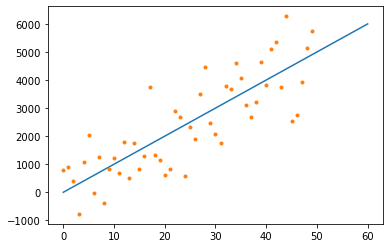

In [19]:
t = np.linspace(0, 60, 61)
plt.plot(t, trajectory(t))
plt.plot(range(50), X, ".")

In [23]:
def predict(x_prev, sqd_prev, v, v_sqd, dt):
    dx = v*dt
    dx_sqd = v_sqd * dt * dt

    x_preditct = x_prev+dx
    sqd_predict = sqd_prev + dx_sqd

    return (x_preditct, sqd_predict)

def update(x_pred, sqd_pred, x_obs, sqd_obs):
    w1 = sqd_pred/(sqd_pred + sqd_obs)
    w2 = sqd_obs/(sqd_pred + sqd_obs)
    
    x_update = x_pred*w2 + x_obs*w1
    sqd_update = sqd_pred*sqd_obs/(sqd_pred + sqd_obs)

    return (x_update, sqd_update)

def Kalman_filter(X, V, sigma_x=1000, sigma_v=10, dt=1.0):
    x_list = []
    sqd_list = []
    
    x_i = X[0]
    sqd_i = sigma_x**2

    x_list.append(x_i)
    sqd_list.append(sqd_i)

    sqd_v = sigma_v ** 2
    sqd_x = sigma_x ** 2

    for i in range(1, len(X)):
        (x_pred, sqd_pred) = predict(x_i, sqd_i, V[i-1], sqd_v, dt)
        (x_i, sqd_i) = update(x_pred, sqd_pred, X[i], sqd_x)

        x_list.append(x_i)
        sqd_list.append(sqd_i)

    return x_list, sqd_list

In [25]:
x_list, sqd_list = Kalman_filter(X, V)

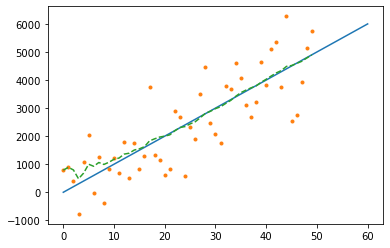

In [26]:
t = np.linspace(0, 60, 61)
plt.plot(t, trajectory(t))
plt.plot(range(50), X, ".")
plt.plot(range(50), x_list, "--")